In [1]:
import json

In [2]:
f = "data/countries.geojson"
with open(f, 'r') as infile:
    g = json.load(infile)

In [3]:
g.keys()


[u'type', u'features']

In [4]:
n_features = len(g['features'])
n_features

255

In [5]:
polygons = []
multipolygons = []
for i, feature in enumerate(g['features']):
    if feature['geometry']['type'] == 'Polygon':
        n_p = len(feature['geometry']['coordinates'])
        polygons.append((i,n_p))
    elif feature['geometry']['type'] == 'MultiPolygon':
        n_p = len(feature['geometry']['coordinates'])
        multipolygons.append((i,n_p))
    

In [6]:
len(polygons)


105

In [7]:
len(multipolygons)


150

In [8]:
multipolygons[:5]

[(2, 3), (3, 2), (5, 16), (7, 10), (8, 8)]

In [9]:
len(feature['geometry']['coordinates'][0])


766

In [10]:
c = feature['geometry']['coordinates']


In [11]:
feature.keys()

[u'geometry', u'type', u'properties']

In [12]:
feature['properties']

{u'ADMIN': u'Zimbabwe', u'ISO_A3': u'ZWE'}

In [13]:
feature['type']

u'Feature'

In [14]:
feature['geometry']['type']

u'Polygon'

In [15]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


Populating the interactive namespace from numpy and matplotlib


/home/serge/anaconda2/envs/gds/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


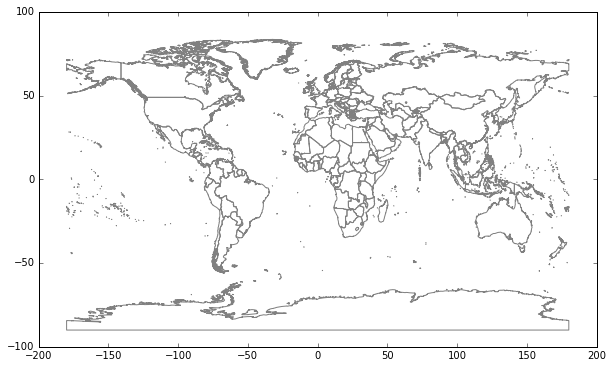

In [16]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
        
    

In [17]:
import pandas as pd

participants = pd.read_csv('data/participants.csv')

In [18]:
participants

,name,email,lon,lat
0,Debra McKay,dmckay@iastate.edu,-93.6465,42.0266
1,Alain Pholo Bala,apholo@uj.ac.za,27.9977,-26.1836
2,Cory Yemen,yemenc@gmail.com,-74.4471,40.5015
3,Johanna Manrique Hernandez,jemanriqueh@gmail.com,-74.0721,-4.7110
4,Sudhir Thakur,thakurs@csus.edu,-121.4944,38.5816
5,David Patton,grazi1m@cmich.edu,-84.7752,43.5912
6,Henry Renski,hrenski@umass.edu,-72.4969,42.3404
7,Enza Maltese,enzamaltese@gmail.com,13.3614,38.1157
8,Xian Bak,fangxian8663@gmail.com,-88.2073,40.1106
9,Cynthia Goytia,cgoytia@utdt.edu,-96.7970,32.7767


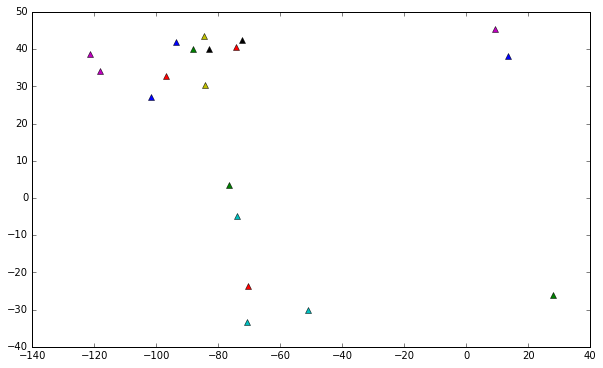

In [19]:
for idx, p in participants.iterrows():
    plot(p['lon'], p['lat'], '^')

In [20]:
p['lon']

-118.2851

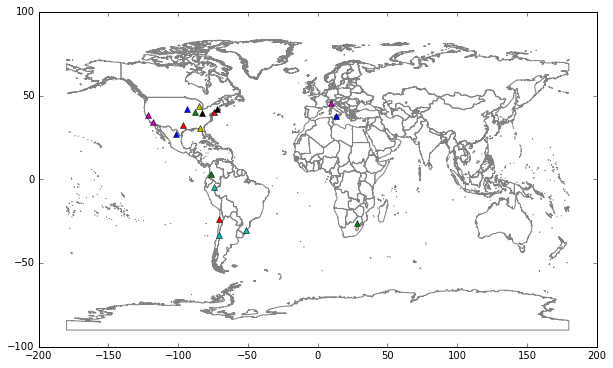

In [21]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants.iterrows():
    plot(p['lon'], p['lat'], '^')     
    

In [22]:
minn = (-93.2550, 44.9778)

In [23]:
import pyproj

In [24]:
geod = pyproj.Geod(ellps='WGS84')

In [25]:
gcd = geod.inv(minn[0], minn[1], 27.9977, -26.1836)
gcd

(88.51392675375249, -52.07449614771201, 14439038.301326025)

In [26]:
gcd[-1] * 0.000621371

8971.999668333254

In [27]:
waypoints = geod.npts(minn[0], minn[1], 27.9977, -26.1836, 20)


In [28]:
waypoints

[(-84.55017113315174, 44.80584990996164),
 (-75.99367233192807, 43.97922150374636),
 (-67.75630625215791, 42.53342598534008),
 (-59.95939730745371, 40.5250588254201),
 (-52.6670427627056, 38.022665784753144),
 (-45.892486791627256, 35.098197384876194),
 (-39.611650300818106, 31.820834657144264),
 (-33.777369238815254, 28.253526775495363),
 (-28.3308111896402, 24.451706730804606),
 (-23.20915404095716, 20.46340997494556),
 (-18.350010790396198, 16.330137995196903),
 (-13.693507620172042, 12.08802888018575),
 (-9.182853111207635, 7.769091214798151),
 (-4.764014878467847, 3.4023911920384973),
 (-0.3849059366991696, -0.9848374389291883),
 (4.005672552069825, -5.366148034129521),
 (8.459178606624064, -9.714867105484755),
 (13.028451692931554, -14.003071107776016),
 (17.768683838023406, -18.200515361975736),
 (22.738051540211657, -22.273489122646836)]

In [29]:
route = [minn]
route.extend(waypoints)
route.append((27.9977, -26.1836))

In [30]:
route = np.array(route)

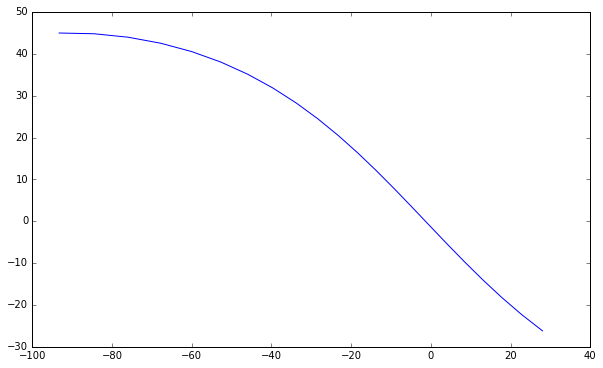

In [31]:
plot(route[:,0], route[:,1])

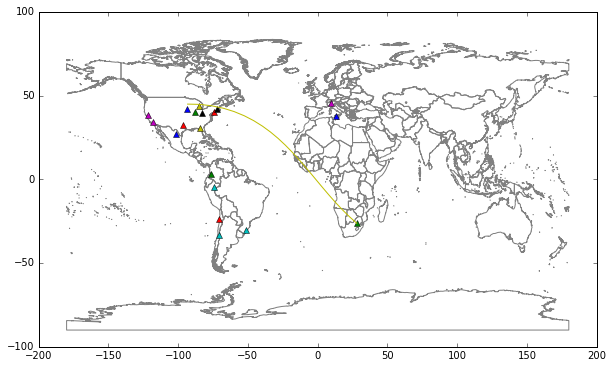

In [32]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants.iterrows():
    plot(p['lon'], p['lat'], '^')     

plot(route[:,0], route[:,1])

## On your own

1. Calculate and plot the great circle routes bringing our participants to the workshop.

# Solution

In [ ]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants.iterrows():
    plot(p['lon'], p['lat'], '^')     


for idx, p in participants.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1])